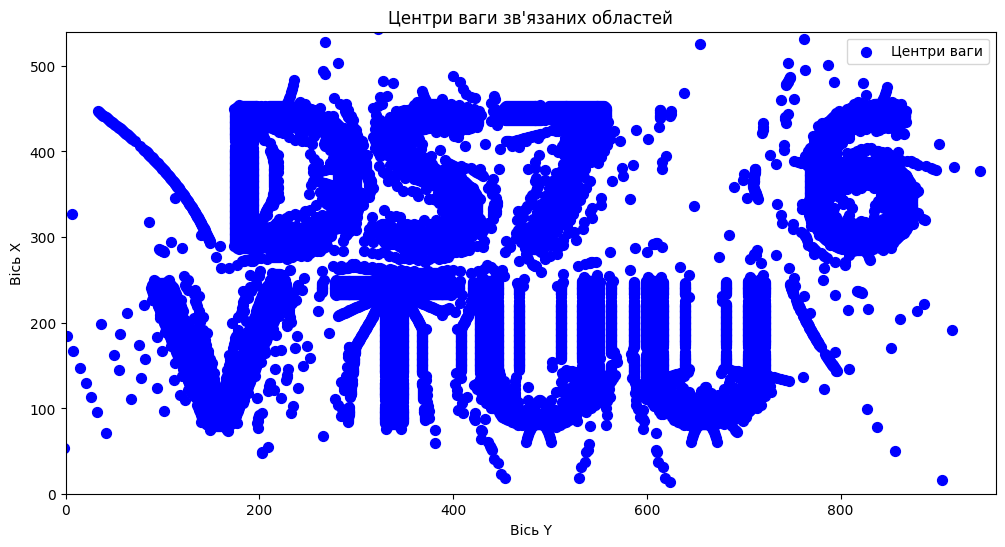

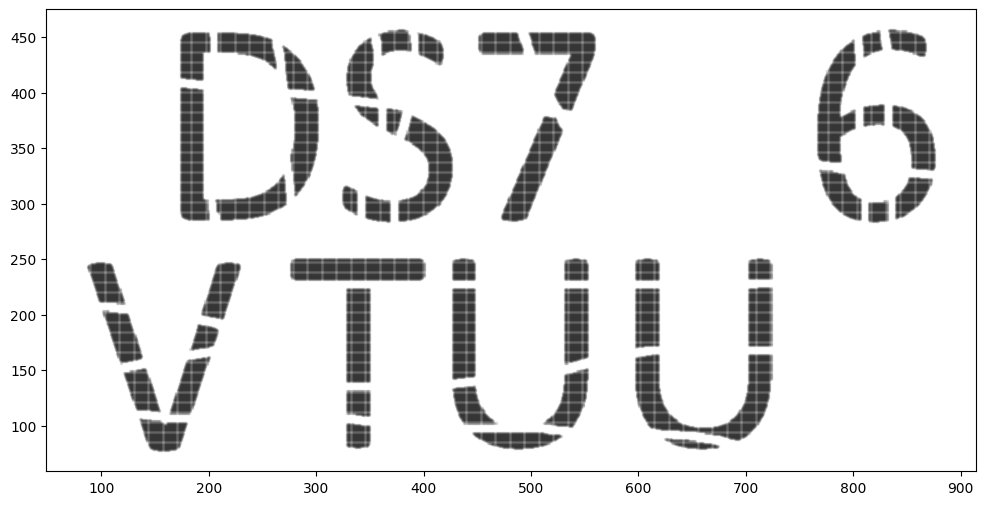

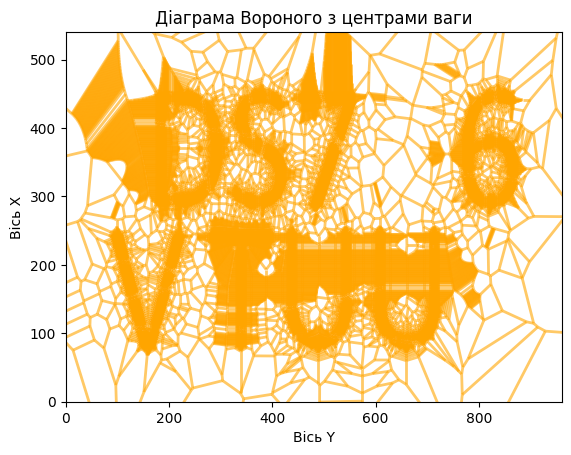

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def read_dataset(file_path):
    return np.loadtxt(file_path)

def find_clusters(data):
    vor = Voronoi(data)
    
    cluster_centers = []
    for indices in vor.regions:
        if not -1 in indices and len(indices) > 0:
            polygon_points = vor.vertices[indices]
            cluster_center = np.mean(polygon_points, axis = 0)
            cluster_centers.append(cluster_center)
    
    return np.array(cluster_centers)

dataset = read_dataset('DS7.txt')
dataset = np.flip(dataset, axis = 1)
cluster_centers = find_clusters(dataset)

plt.figure(figsize = (12, 6))
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c = 'blue', marker = 'o', s = 50, label = 'Центри ваги')
plt.title('Центри ваги зв\'язаних областей')
plt.xlim(0, 960)
plt.ylim(0, 540)
plt.xlabel('Вісь Y')
plt.ylabel('Вісь X')
plt.legend()
plt.savefig('cluster_centers.png', bbox_inches = 'tight')

plt.figure(figsize = (12, 6))
plt.scatter(dataset[:, 0], dataset[:, 1], c = 'black', marker = '.', s = 10, alpha = 0.1, label = 'Точки датасету')
vor = Voronoi(cluster_centers)
voronoi_plot_2d(vor, show_vertices = False, line_colors = 'orange', line_width = 2, line_alpha = 0.6, point_size = 0)
plt.title('Діаграма Вороного з центрами ваги')
plt.xlim(0, 960)
plt.ylim(0, 540)
plt.xlabel('Вісь Y')
plt.ylabel('Вісь X')
plt.savefig('voronoi_diagram.png', bbox_inches = 'tight')

plt.show()